In [10]:
from superflexpy.implementation.elements.hbv import PowerReservoir
from superflexpy.implementation.elements.gr4j import UnitHydrograph1
from superflexpy.implementation.root_finders.pegasus import PegasusPython
from superflexpy.implementation.numerical_approximators.implicit_euler import ImplicitEulerPython
from superflexpy.framework.unit import Unit
from superflexpy.framework.node import Node
from superflexpy.framework.network import Network

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# here we select a solver and an approximator for the superFlex model. 
solver_python = PegasusPython()
approximator = ImplicitEulerPython(root_finder=solver_python)

In [84]:
# A first instance of a reservoir is created. 

reservoir = PowerReservoir(
    parameters={'k': 0.01, 'alpha': 2.0},
    states={'S0': 10.0},
    approximation=approximator,
    id='R'
)

#First lag function of the model

lag_function = UnitHydrograph1(
    parameters={'lag-time': 2.5},
    states={'lag': None},
    id='lag-fun'
)

In [85]:
unit_1 = Unit(
    layers=[[reservoir], [lag_function]],
    id='unit-1'
)

In [96]:
# We create a precipitation time series of 200 time steps and predict the output of the reservoir

precipitation = np.array([3.2, 4.5, 2.0, 1.8, 5.5, 3.0, 0, 0, 4.0, 6.2, 3.5, 2.0, 1.0, 5.0, 3.8, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0 ,0 ,0 ,0 ,0 ,10 ,0 ,0 ,0 ,0])

unit_1.set_timestep(1.0)
unit_1.set_input([precipitation])
output = unit_1.get_output()[0]

In [97]:
#reservoir_state = unit_1.state_array[:, 0]
r_state = unit_1.get_internal(id='R', attribute='state_array')[:, 0]
r_output = unit_1.call_internal(id='R', method='get_output', solve=False)[0]


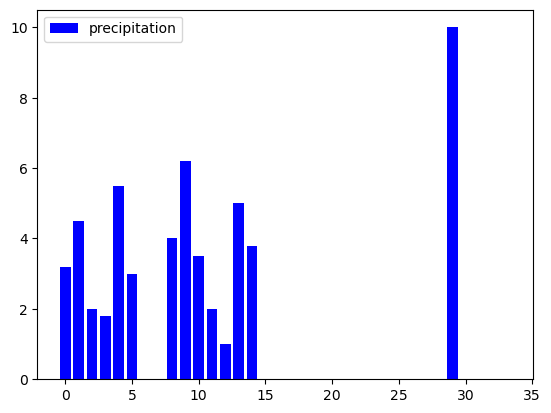

In [98]:
plt.bar(range(len(precipitation)), precipitation, color = 'blue', label = 'precipitation')

plt.legend()
plt.show()

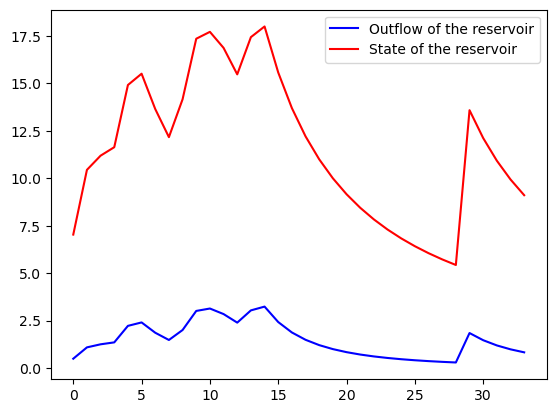

In [99]:
plt.plot(range(len(precipitation)), r_output, color = 'blue', label = 'Outflow of the reservoir')
plt.plot(range(len(precipitation)), r_state, color = 'red', label = 'State of the reservoir')

plt.legend()
plt.show()

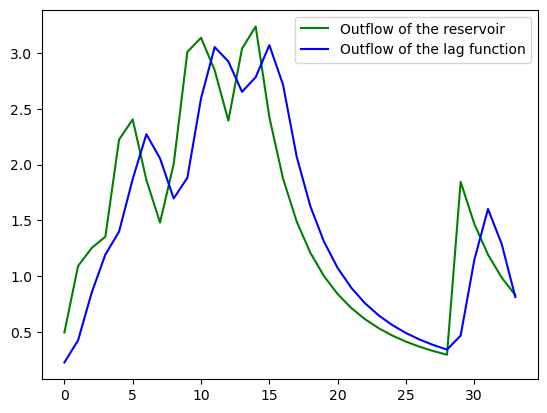

In [100]:
plt.plot(range(len(precipitation)), r_output, color = 'green', label = 'Outflow of the reservoir')
plt.plot(range(len(precipitation)), output, color = 'blue', label = 'Outflow of the lag function')


plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


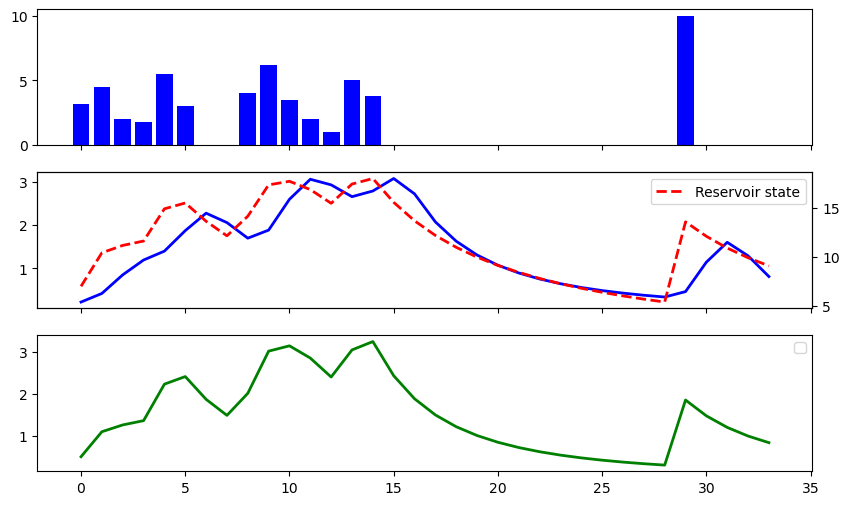

In [104]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
ax[0].bar(x=range(len(precipitation)), height=precipitation, color='blue', label = 'precipitation')
plt.legend()

ax[1].plot(range(len(precipitation)), output, color='blue', lw=2, label='Outflow')
ax_bis = ax[1].twinx()
ax_bis.plot(range(len(precipitation)), r_state, color='red', lw=2, ls='--', label='Reservoir state')
plt.legend()

ax[2].plot(range(len(precipitation)), r_output, color='green', lw=2, label='Reservoir state')

plt.legend()
#ax_bis.plot(range(len(precipitation)), r_output, color='yellow', lw=2, ls='--', label='Reservoir state')